# **TwiSTAR - Flat earth data**



##Librer√≠as

In [ ]:
import os
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import plotly.express as px
!pip install neattext
import neattext as ntx

import nltk.downloader
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams


##Lectura de datos

Para el presente an√°lisis de texto, se usa un dataset extra√≠do con Tweepy y relacionado a *menciones* sobre "*flat earth*" en Twitter.

In [ ]:
data = pd.read_csv('flat_earth_tweets.csv')

In [ ]:
data.head()

id        user_name                 user_location  \
0  1472188544718450688  L Fnord Hubbard  New River Valley and Bermuda   
1  1472182078347395075    Charles Putin         Wherever The Truth Is   
2  1472181355844976644    Charles Putin         Wherever The Truth Is   
3  1472178963720163335  L Fnord Hubbard  New River Valley and Bermuda   
4  1472178578376863745    Charles Putin         Wherever The Truth Is   

                      user_description         user_created  user_followers  \
0      fellow conspirator of the epoch  2017-12-07 07:45:07              64   
1  Every Horizon is Flat for a reason.  2015-08-13 00:26:04              85   
2  Every Horizon is Flat for a reason.  2015-08-13 00:26:04              85   
3      fellow conspirator of the epoch  2017-12-07 07:45:07              64   
4  Every Horizon is Flat for a reason.  2015-08-13 00:26:04              85   

   user_friends  user_favourites  user_verified                 date  \
0            23                3          False  2021-12-18 12:54:35   
1             1              595          False  2021-12-18 12:28:53   
2             1              595          False  2021-12-18 12:26:01   
3            23                3          False  2021-12-18 12:16:31   
4             1              595          False  2021-12-18 12:14:59   

                                                text       hashtags  \
0  Ignore this message.\nP D Q Bach binds your fu...  ['FlatEarth']   
1  History is a Lie \n#FlatEarth https://t.co/QFR...  ['FlatEarth']   
2  Flat water. Sea Level is Key in proving What "...            NaN   
3  The surgeon general warns that a dead rock sta...  ['flatEarth']   
4  The Water between Skegness and Hunstanton is F...  ['FlatEarth']   

                source  retweets  favorites  is_retweet  
0              fnorder         0          0       False  
1  Twitter for Android         0          0       False  
2  Twitter for Android         0          0       False  
3              fnorder         0          0       False  
4  Twitter for Android         0          0       False

In [ ]:
display(data.shape, str(data.shape[0])+" tweets in dataset") 

(752, 16)

'752 tweets in dataset'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                752 non-null    int64 
 1   user_name         752 non-null    object
 2   user_location     567 non-null    object
 3   user_description  699 non-null    object
 4   user_created      752 non-null    object
 5   user_followers    752 non-null    int64 
 6   user_friends      752 non-null    int64 
 7   user_favourites   752 non-null    int64 
 8   user_verified     752 non-null    bool  
 9   date              752 non-null    object
 10  text              752 non-null    object
 11  hashtags          510 non-null    object
 12  source            752 non-null    object
 13  retweets          752 non-null    int64 
 14  favorites         752 non-null    int64 
 15  is_retweet        752 non-null    bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 83.8+ KB


In [ ]:
data['date'] = pd.to_datetime(data['date']).dt.date  #converting date column to date format
data.head()

id        user_name                 user_location  \
0  1472188544718450688  L Fnord Hubbard  New River Valley and Bermuda   
1  1472182078347395075    Charles Putin         Wherever The Truth Is   
2  1472181355844976644    Charles Putin         Wherever The Truth Is   
3  1472178963720163335  L Fnord Hubbard  New River Valley and Bermuda   
4  1472178578376863745    Charles Putin         Wherever The Truth Is   

                      user_description         user_created  user_followers  \
0      fellow conspirator of the epoch  2017-12-07 07:45:07              64   
1  Every Horizon is Flat for a reason.  2015-08-13 00:26:04              85   
2  Every Horizon is Flat for a reason.  2015-08-13 00:26:04              85   
3      fellow conspirator of the epoch  2017-12-07 07:45:07              64   
4  Every Horizon is Flat for a reason.  2015-08-13 00:26:04              85   

   user_friends  user_favourites  user_verified        date  \
0            23                3          False  2021-12-18   
1             1              595          False  2021-12-18   
2             1              595          False  2021-12-18   
3            23                3          False  2021-12-18   
4             1              595          False  2021-12-18   

                                                text       hashtags  \
0  Ignore this message.\nP D Q Bach binds your fu...  ['FlatEarth']   
1  History is a Lie \n#FlatEarth https://t.co/QFR...  ['FlatEarth']   
2  Flat water. Sea Level is Key in proving What "...            NaN   
3  The surgeon general warns that a dead rock sta...  ['flatEarth']   
4  The Water between Skegness and Hunstanton is F...  ['FlatEarth']   

                source  retweets  favorites  is_retweet  
0              fnorder         0          0       False  
1  Twitter for Android         0          0       False  
2  Twitter for Android         0          0       False  
3              fnorder         0          0       False  
4  Twitter for Android         0          0       False

##Detecci√≥n preliminar de datos



*   Conteo de tweets en funci√≥n de la localizaci√≥n del usuario.
*   Conteo de tweets en funci√≥n de la plataforma utilizada por el usuario.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0, flags=flags)


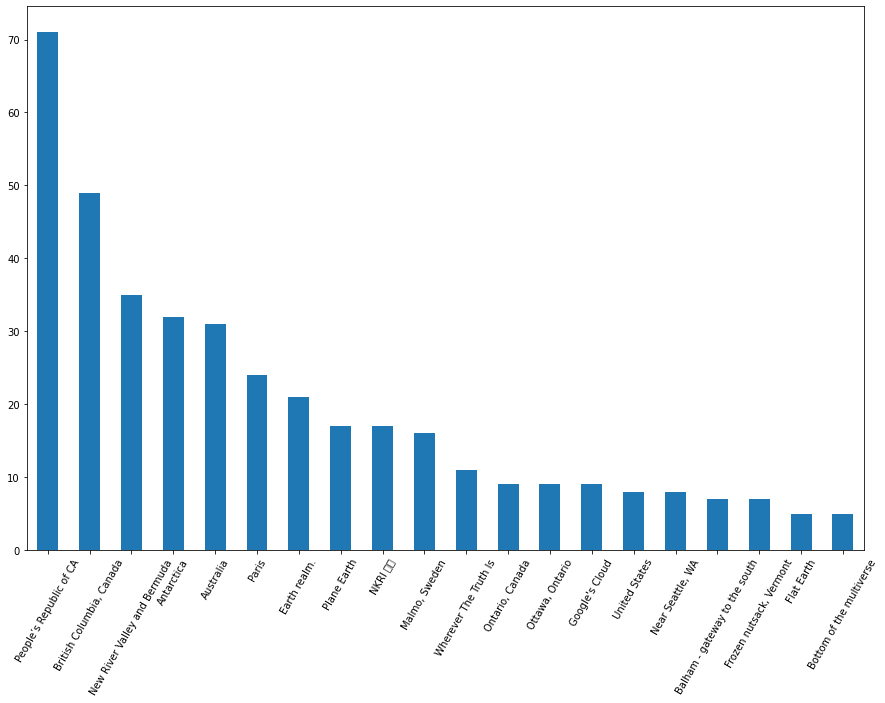

In [ ]:
#Conteo de tweets en funci√≥n de la localizaci√≥n del usuario
plt.figure(figsize=(15,10))
data['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

In [ ]:
#Depuraci√≥n de tweets duplicados
data=data.drop_duplicates('text')             
data.shape

(752, 16)

In [ ]:
data.source.value_counts()

Twitter for Android        226
Twitter Web App            193
Twitter for iPhone         183
Twitter for iPad            49
fnorder                     35
TweetDeck                   17
NewAutoPostTwitter          16
masterdebater.net            9
IFTTT                        7
Tweetbot for Mac             5
ArseniKarp                   2
Spreaker                     2
Etsy                         2
Instagram                    1
oysttyer                     1
TweetCaster for Android      1
Paper.li                     1
SamReadWriteBot              1
The Social Jukebox           1
Name: source, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

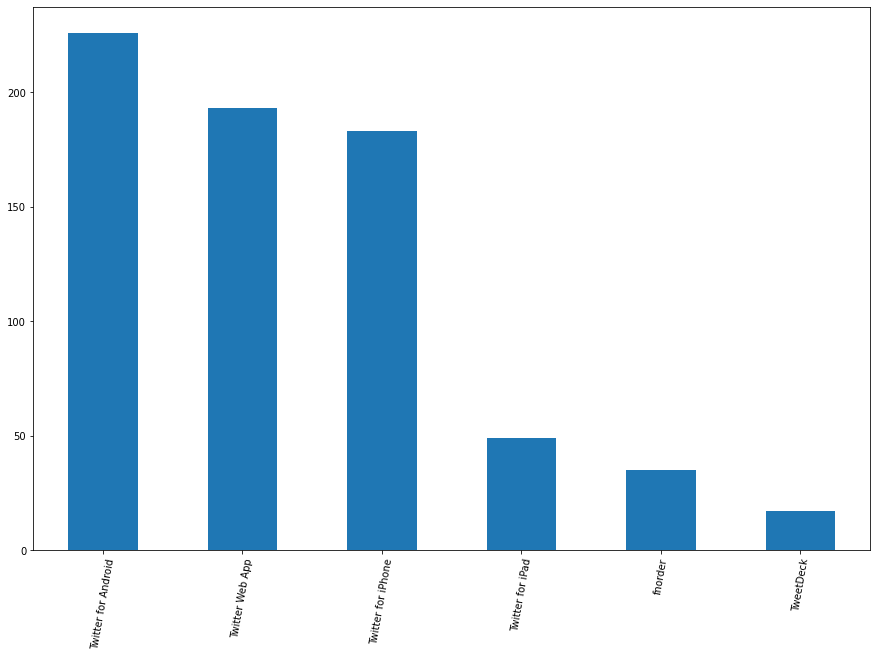

In [ ]:
#Visualizaci√≥n de los tweets en funci√≥n de la plataforma utilizada por el usuario
plt.figure(figsize=(15,10))
data['source'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=80)

In [ ]:
#N√∫mero de d√≠as considerados en el dataset
len(data['date'].unique())

10

In [ ]:
data.sort_values(by=['date'], ascending=[True]).head(100)

id              user_name    user_location  \
751  1469081475576471557              H o l l y       Antarctica   
747  1469092731847061504         Dusan Dragovic     Earth realm.   
750  1469083225293262848        Michael Denihan              NaN   
749  1469083468743204878           Bert Rickles  Ottawa, Ontario   
748  1469088918494748674           AQUCBTMaster              NaN   
..                   ...                    ...              ...   
690  1469307379359571980           Bert Rickles  Ottawa, Ontario   
717  1469248208312360964                    Wim              NaN   
691  1469305843275509769  Braders üá™üá∫üö¥‚Äç‚ôÄÔ∏è‚òÆÔ∏èüë©‚Äçü¶Ωüíôüåπ     Bristol, UK.   
692  1469303452140515328                    Wim              NaN   
693  1469301779972165633                    Wim              NaN   

                                      user_description         user_created  \
751  Human Rights Activist, Graphic Artist, Photogr...  2021-12-05 09:18:24   
747  Educate every individual - there's only one Tr...  2011-03-14 21:17:30   
750                                                NaN  2020-05-19 04:00:29   
749  Deeply #profound #meaning can be found in the ...  2016-04-13 14:13:48   
748                                                NaN  2021-09-30 16:49:21   
..                                                 ...                  ...   
690  Deeply #profound #meaning can be found in the ...  2016-04-13 14:13:48   
717  Who am I?  Who is but the form following the f...  2010-02-24 19:36:48   
691  MTBing socialist, wants a fairer future for ev...  2021-06-17 14:25:21   
692  Who am I?  Who is but the form following the f...  2010-02-24 19:36:48   
693  Who am I?  Who is but the form following the f...  2010-02-24 19:36:48   

     user_followers  user_friends  user_favourites  user_verified        date  \
751              78           152              410          False  2021-12-09   
747              72           287              805          False  2021-12-09   
750              22            41               99          False  2021-12-09   
749              85           112             3131          False  2021-12-09   
748               5            12               84          False  2021-12-09   
..              ...           ...              ...            ...         ...   
690              85           112             3131          False  2021-12-10   
717             132           238             1131          False  2021-12-10   
691            2726          2953            10474          False  2021-12-10   
692             132           238             1131          False  2021-12-10   
693             132           238             1131          False  2021-12-10   

                                                  text  \
751  @MASKLESSSS @Quercuas Yes, exactly (you certai...   
747  Hollywood Space Agency, #USA first to take ove...   
750  #QAnonCult @QAnonCult the asteroid that will p...   
749  Oh yeah!!!!! this is definitely going to be my...   
748  #CBT @Iloux4 @drunkmaikl @ZajacK_BK #ballbusti...   
..                                                 ...   
690  With almost 2 weeks left until the #December #...   
717  @AuthenticHollyH The stars do change. Also a s...   
691  @mozdt I've always found a hashtag or two draw...   
692  @AuthenticHollyH @ItsMrSensible And so is our ...   
693  @AuthenticHollyH @ItsMrSensible Something that...   

                                hashtags               source  retweets  \
751                                  NaN  Twitter for Android         0   
747                              ['USA']      Twitter Web App         0   
750           ['QAnonCult', 'FlatEarth']  Twitter for Android         0   
749                        ['FlatEarth']      Twitter Web App         0   
748  ['CBT', 'ballbusting', 'FlatEarth']      Twitter Web App         0   
..                                   ...                  ...       ...   
690             ['December',

##Limpieza de datos

Se puntualiza la data de inter√©s y se depuran los dem√°s elementos que no aportan valor al desarrollo del an√°lisis.

In [ ]:
#Depuraci√≥n de datos innecesarios
data.drop(columns={"id","user_name","user_description","user_created","user_followers",\
                   "user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet"},inplace=True) 

In [ ]:
pd.set_option('display.max_colwidth', 700)
data.head()

user_location        date  \
0  New River Valley and Bermuda  2021-12-18   
1         Wherever The Truth Is  2021-12-18   
2         Wherever The Truth Is  2021-12-18   
3  New River Valley and Bermuda  2021-12-18   
4         Wherever The Truth Is  2021-12-18   

                                                                                                                                            text  
0                                      Ignore this message.\nP D Q Bach binds your furry conquering moose with a rounded desk. #FlatEarth IYH988  
1                                                                                          History is a Lie \n#FlatEarth https://t.co/QFRhOs5O7u  
2  Flat water. Sea Level is Key in proving What "Shape" Earth is. \nYou can see it test it and repeat it, but you belie‚Ä¶ https://t.co/Lj5TXIl5jS  
3                      The surgeon general warns that a dead rock star looses your dark gold Pod Person with a rounded tree. #flatEarth\nR634881  
4                                 The Water between Skegness and Hunstanton is Flat. Don't believe come see.\n#FlatEarth https://t.co/v7zATkppPz

In [ ]:
#Limpieza de los datos del dataset a trav√©s de la librer√≠a neattext
data['clean_data']=data['text'].apply(ntx.remove_hashtags)
data['clean_data']=data['clean_data'].apply(ntx.remove_urls)
data['clean_data']=data['clean_data'].apply(ntx.remove_userhandles)
data['clean_data']=data['clean_data'].apply(ntx.remove_multiple_spaces)
data['clean_data']=data['clean_data'].apply(ntx.remove_special_characters)

In [ ]:
data[['clean_data','text']].head()

clean_data  \
0                      Ignore this messageP D Q Bach binds your furry conquering moose with a rounded desk IYH988   
1                                                                                               History is a Lie    
2  Flat water Sea Level is Key in proving What Shape Earth is You can see it test it and repeat it but you belie    
3    The surgeon general warns that a dead rock star looses your dark gold Pod Person with a rounded tree R634881   
4                                        The Water between Skegness and Hunstanton is Flat Dont believe come see    

                                                                                                                                            text  
0                                      Ignore this message.\nP D Q Bach binds your furry conquering moose with a rounded desk. #FlatEarth IYH988  
1                                                                                          History is a Lie \n#FlatEarth https://t.co/QFRhOs5O7u  
2  Flat water. Sea Level is Key in proving What "Shape" Earth is. \nYou can see it test it and repeat it, but you belie‚Ä¶ https://t.co/Lj5TXIl5jS  
3                      The surgeon general warns that a dead rock star looses your dark gold Pod Person with a rounded tree. #flatEarth\nR634881  
4                                 The Water between Skegness and Hunstanton is Flat. Don't believe come see.\n#FlatEarth https://t.co/v7zATkppPz

# **An√°lisis de Sentimientos - Flat earth data**

##Librer√≠as

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Detecci√≥n y depuraci√≥n de stopwords

El lenguaje requiere del uso de art√≠culos, preposiciones y pronombres, que en el presente an√°lisis son denominados "*stopwords*" y que com√∫nmente son palabras que no tienden a generar ning√∫n cambio en la polaridad del tweet.

In [3]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Detecci√≥n de 'stopwords'
stop_words = stopwords.words('english')
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [ ]:
#Depuraci√≥n de stopwords
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
# clean_tweet = " ".join(lemmatizer.lemmatize(word) for word in clean_tweet.split())
  return clean_tweet

In [ ]:
data['clean_data'] = data['clean_data'].apply(lambda x: stopWords(x))

In [ ]:
data.head(100)

user_location        date  \
0   New River Valley and Bermuda  2021-12-18   
1          Wherever The Truth Is  2021-12-18   
2          Wherever The Truth Is  2021-12-18   
3   New River Valley and Bermuda  2021-12-18   
4          Wherever The Truth Is  2021-12-18   
..                           ...         ...   
95                           NaN  2021-12-16   
96                           NaN  2021-12-16   
97  New River Valley and Bermuda  2021-12-16   
98                           NaN  2021-12-16   
99  In a Dream inside of a dream  2021-12-16   

                                                                                                                                             text  \
0                                       Ignore this message.\nP D Q Bach binds your furry conquering moose with a rounded desk. #FlatEarth IYH988   
1                                                                                           History is a Lie \n#FlatEarth https://t.co/QFRhOs5O7u   
2   Flat water. Sea Level is Key in proving What "Shape" Earth is. \nYou can see it test it and repeat it, but you belie‚Ä¶ https://t.co/Lj5TXIl5jS   
3                       The surgeon general warns that a dead rock star looses your dark gold Pod Person with a rounded tree. #flatEarth\nR634881   
4                                  The Water between Skegness and Hunstanton is Flat. Don't believe come see.\n#FlatEarth https://t.co/v7zATkppPz   
..                                                                                                                                            ...   
95                                                                    @_davidlimbrick Sometimes reason isn't enough to overcome stupid #FlatEarth   
96                                                          #FlatEarth sorry you had to find out the truth this way guys! https://t.co/zWAFGOulzu   
97                      The rings of Uranus is in opposition to Aquarius.\nBe orgasmic in that light! Don't hesitate!\nZeus hates you. #FlatEarth   
98     New parody out. Hot off the press! \n\nhttps://t.co/hLRrh8hB7K #FlatEarth #news #animation #parody #justjokes #animator #comic #CNN #anime   
99                      Yep.\n\nThe EARTH IS FLAT.\n\n#FlatEarth \n#ILLUMINATI \n#GermTheoryHOAX\n#TerrainTheoryAllTheWay https://t.co/Z5QDWzPfCq   

                                                                                   clean_data  
0                   Ignore messageP D Q Bach binds furry conquering moose rounded desk IYH988  
1                                                                                 History Lie  
2                 Flat water Sea Level Key proving What Shape Earth You see test repeat belie  
3   The surgeon general warns dead rock star looses dark gold Pod Person rounded tree R634881  
4                                    The Water Skegness Hunstanton Flat Dont believe come see  
..                                                                                        ...  
95                                               Sometimes reason isnt enough overcome stupid  
96                                                                  sorry find truth way guys  
97              The rings Uranus opposition AquariusBe orgasmic light Dont hesitateZeus hates  
98                                                                       New parody Hot press  
99                                                                      Yep The EARTH IS FLAT  

[100 rows x 4 columns]

## Estudio de la polarizaci√≥n y subjetividad de los tweets

In [ ]:
# Definici√≥n de la funci√≥n que asigna polaridad/subjetividad a los tweets
from textblob import TextBlob
def blob_fun(text):
  senti = TextBlob(text)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

In [ ]:
blob_fun(data['clean_data'][5])

{'polarity': 0.0, 'sentiment': 'Neutral', 'subjectivity': 0.0}

In [ ]:
data['results'] = data['clean_data'].apply(blob_fun)

In [ ]:
data.drop(columns={"user_location",'text'},inplace=True)

In [ ]:
data.head(100)


date  \
0   2021-12-18   
1   2021-12-18   
2   2021-12-18   
3   2021-12-18   
4   2021-12-18   
..         ...   
95  2021-12-16   
96  2021-12-16   
97  2021-12-16   
98  2021-12-16   
99  2021-12-16   

                                                                                   clean_data  \
0                   Ignore messageP D Q Bach binds furry conquering moose rounded desk IYH988   
1                                                                                 History Lie   
2                 Flat water Sea Level Key proving What Shape Earth You see test repeat belie   
3   The surgeon general warns dead rock star looses dark gold Pod Person rounded tree R634881   
4                                    The Water Skegness Hunstanton Flat Dont believe come see   
..                                                                                        ...   
95                                               Sometimes reason isnt enough overcome stupid   
96                                                                  sorry find truth way guys   
97              The rings Uranus opposition AquariusBe orgasmic light Dont hesitateZeus hates   
98                                                                       New parody Hot press   
99                                                                      Yep The EARTH IS FLAT   

                                                                                             results  
0                                     {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}  
1                                     {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}  
2                             {'polarity': -0.0125, 'subjectivity': 0.5625, 'sentiment': 'Negative'}  
3   {'polarity': -0.09999999999999999, 'subjectivity': 0.43333333333333335, 'sentiment': 'Negative'}  
4                               {'polarity': -0.025, 'subjectivity': 0.125, 'sentiment': 'Negative'}  
..                                                                                               ...  
95                 {'polarity': -0.39999999999999997, 'subjectivity': 0.75, 'sentiment': 'Negative'}  
96                                  {'polarity': -0.5, 'subjectivity': 1.0, 'sentiment': 'Negative'}  
97                                   {'polarity': 0.4, 'subjectivity': 0.7, 'sentiment': 'Positive'}  
98    {'polarity': 0.19318181818181818, 'subjectivity': 0.6522727272727273, 'sentiment': 'Positive'}  
99                              {'polarity': -0.025, 'subjectivity': 0.125, 'sentiment': 'Negative'}  

[100 rows x 3 columns]

In [ ]:
data = data.join(pd.json_normalize(data=data['results']))

In [ ]:
data.head()

date  \
0  2021-12-18   
1  2021-12-18   
2  2021-12-18   
3  2021-12-18   
4  2021-12-18   

                                                                                  clean_data  \
0                  Ignore messageP D Q Bach binds furry conquering moose rounded desk IYH988   
1                                                                                History Lie   
2                Flat water Sea Level Key proving What Shape Earth You see test repeat belie   
3  The surgeon general warns dead rock star looses dark gold Pod Person rounded tree R634881   
4                                   The Water Skegness Hunstanton Flat Dont believe come see   

                                                                                            results  \
0                                    {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}   
1                                    {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}   
2                            {'polarity': -0.0125, 'subjectivity': 0.5625, 'sentiment': 'Negative'}   
3  {'polarity': -0.09999999999999999, 'subjectivity': 0.43333333333333335, 'sentiment': 'Negative'}   
4                              {'polarity': -0.025, 'subjectivity': 0.125, 'sentiment': 'Negative'}   

   polarity  subjectivity sentiment  
0    0.0000      0.000000   Neutral  
1    0.0000      0.000000   Neutral  
2   -0.0125      0.562500  Negative  
3   -0.1000      0.433333  Negative  
4   -0.0250      0.125000  Negative

In [ ]:
# Clasificaci√≥n de tweets por series
positive_tweet =  data[data['sentiment'] == 'Positive']['clean_data']
negative_tweet =  data[data['sentiment'] == 'Negative']['clean_data']
neutral_tweet =  data[data['sentiment'] == 'Neutral']['clean_data']

## Generaci√≥n de WordClouds por opini√≥n

In [ ]:
# Definici√≥n de la funci√≥n WordCloud
from wordcloud import WordCloud
def cloud_of_Words(tweet_cat,title):
    forcloud = ' '.join([tweet for tweet in tweet_cat])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))

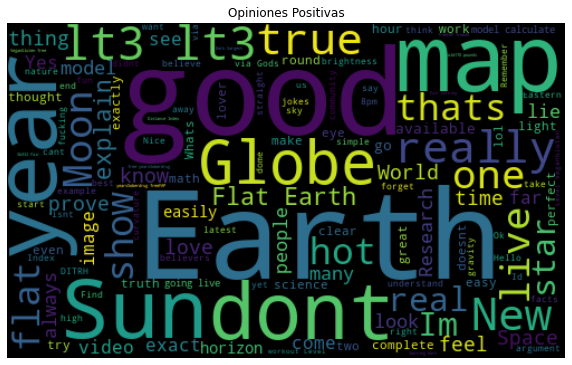

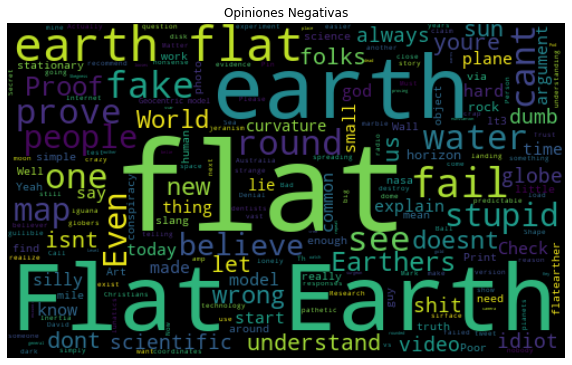

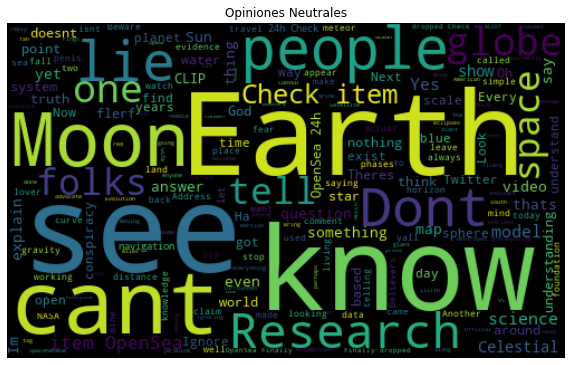

<Figure size 720x576 with 0 Axes>

In [ ]:
# Creaci√≥n de wordclouds por opini√≥n
plt.figure(figsize = (10,8))
cloud_of_Words(positive_tweet, 'Opiniones Positivas')
cloud_of_Words(negative_tweet, 'Opiniones Negativas')
cloud_of_Words(neutral_tweet, 'Opiniones Neutrales')

## Visualizaci√≥n del an√°lisis de sentimientos

In [ ]:
# Clasificaci√≥n de tweets por opini√≥n
positive_tokens = [token for line in positive_tweet for token in line.split()]
negative_tokens = [token for line in negative_tweet for token in line.split()]
neutral_tokens = [token for line in neutral_tweet for token in line.split()]

In [ ]:
# Obtenci√≥n de palabras m√°s usadas
from collections import Counter
def get_maxtoken(tweets,num=30):
  word_tokens = Counter(tweets)
  max_common = word_tokens.most_common(num)
  return dict(max_common)

In [ ]:
def token_df_vis(x, title):
  df = pd.DataFrame(get_maxtoken(x).items(),columns=['words','count'])
  # plt.figure(figsize = (20,5))
  # plt.title(title)
  # plt.xticks(rotation=45)
  fig = px.bar(df,x='words',y='count',title = title)
  fig.show()

In [ ]:
token_df_vis(positive_tokens,'Opiniones Positivas')
token_df_vis(negative_tokens,'Opiniones Negativas')
token_df_vis(neutral_tokens,'Opiniones Neutrales')

In [ ]:
fig = px.scatter(data,x='polarity',y='subjectivity')
fig.show()

In [ ]:
def percent(x,y):
  return print("Percentage of "+y+" tweets :",round(len(x)/data.shape[0]*100,3),"%")

In [ ]:
percent(positive_tweet, 'positive')
percent(negative_tweet, 'negative')
percent(neutral_tweet, 'neutral')

Percentage of positive tweets : 28.989 %
Percentage of negative tweets : 23.138 %
Percentage of neutral tweets : 47.872 %


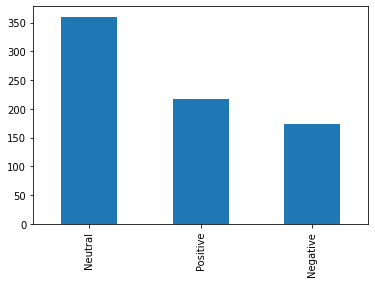

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')